In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
import tensorflow.keras as keras
import tensorflow as tf
import pandas as pd

In [3]:
from sklearn.datasets import *
from sklearn.preprocessing import minmax_scale

### First lets generate data. Scikit learn library has an awsome function called make blobs. Blobs are data points that belong to N chosen gaussian distributions (N distinct classes). 

In [4]:
features,target = make_blobs(n_samples = 500,n_features=2,centers=2,random_state=75,cluster_std = 5)

### Next we divide the data into a training and test sets

In [5]:
features = minmax_scale(features)
k = int(len(features)*0.6)

In [6]:
X_train,Y_train = features[0:k,:],target[0:k]
X_test,Y_test = features[k:,:],target[k:]

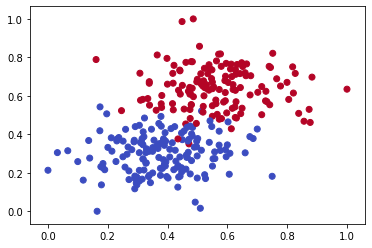

In [7]:
plt.scatter(X_train[:,0],X_train[:,1], c = Y_train, cmap = "coolwarm")
plt.show()

In [8]:
# Define data size and batch size
n_samples = 1000 
batch_size = 100
n_features = 2

### Our single layer prceptron starts from intitial weights of zeros for all inputs. It gradually learns the best set of weghts that ultimately create a distinct boundary between the two gaussian distributions.

(0, 1)

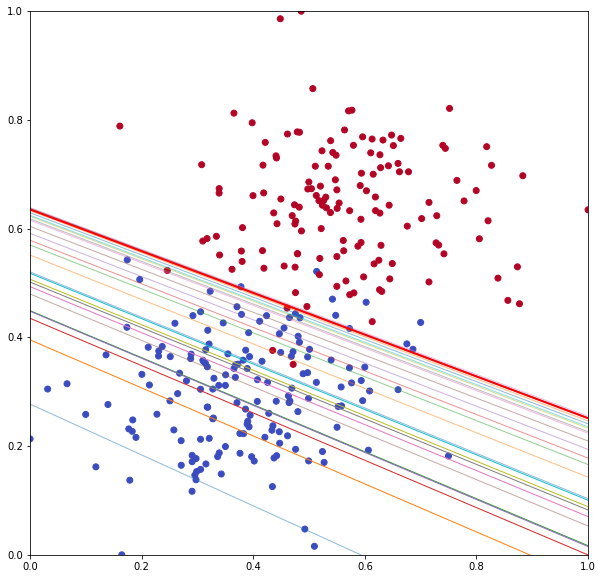

In [11]:
f,ax = plt.subplots(figsize = (10,10))
plt.scatter(X_train[:,0],X_train[:,1], c = Y_train, cmap = "coolwarm")

model = keras.models.Sequential()
model.add(keras.layers.Dense(1,input_dim = 2, activation = 'sigmoid', kernel_initializer = keras.initializers.Zeros()))
model.compile(loss = 'mse', optimizer = 'SGD', metrics = ['accuracy'])

for _i in range(500):
    model.fit(X_train,Y_train.reshape(-1,1),epochs = 1, verbose = 0)

    Weight = model.layers[0].get_weights()[0]
    Bias = model.layers[0].get_weights()[1]

    Weight_X1,Weight_X2 = Weight
    #print (Weight_X1, Weight_X2)
    B = Bias[0]
    
    def linear_disc(x1,wx1,wx2,bias):
        return (-wx1*x1 + (-bias))/(wx2)


    g = np.linspace(0,1,10)
    gp = linear_disc(g,Weight_X1[0],Weight_X2[0],B)

    

    if _i % 25 == 0:
        plt.plot(g,gp, linewidth = 1, alpha = 0.5)
    elif _i < 50:
        if _i % 5 == 0:
            plt.plot(g,gp, linewidth = 1)
        
plt.plot(g,gp, linewidth = 2, alpha = 1, c = 'r')
plt.xlim([0,1])
plt.ylim([0,1])

### Some Cross Validation & Evaluation Metrics

In [89]:
from keras import regularizers

#Create the model
def makemod():
    model = keras.models.Sequential()
    model.add(
        keras.layers.Dense(
            1,input_dim = 2, activation = 'sigmoid', 
            kernel_initializer = keras.initializers.Zeros(),
            kernel_regularizer=regularizers.l2(0.01)
            
        )
    )
    model.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])
    return model

#Define the the number of folds
folds = 10

accuracy = []

for _i in range(folds):
    
        #Further split the training into two parts
        
    temp = np.hstack([X_train, Y_train.reshape(-1,1)])
    
        #Randomize the order for each itteration
        
    np.random.shuffle(temp)
    learn = temp[0:int(len(temp)*0.8)]
    validation = temp[int(len(temp)*0.8):]
    x, y = np.hsplit(learn, [2])
    x_,y_ = np.hsplit(validation,[2])
    
        # fit the model
        
    model = makemod()
    model.fit(x,y,epochs = 200, verbose = 0)
    y_hat = model.predict_classes(x_)
    
        #save the accuracy score for each run
        
    accuracy.append(np.sum(y_ == y_hat)/len(y_hat))

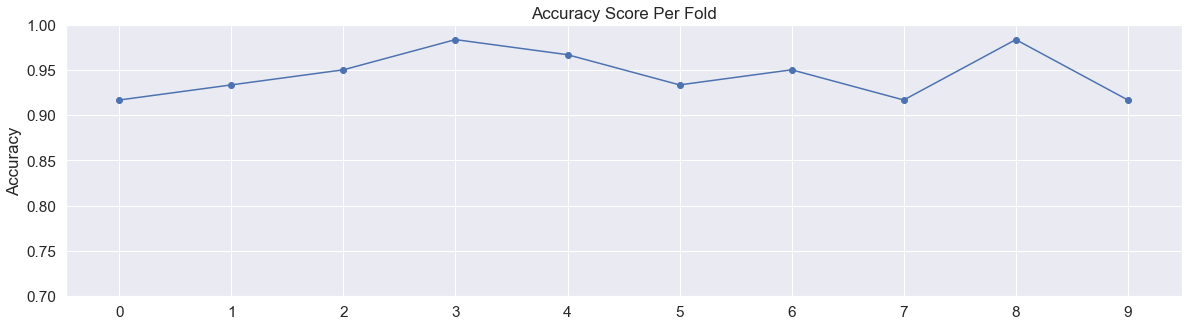

In [218]:
f,ax = plt.subplots(figsize = (20,5))
plt.plot(range(len(accuracy)),accuracy)
plt.scatter(range(len(accuracy)),accuracy)
plt.ylim([0.7,1])
plt.xticks(range(10))
plt.ylabel('Accuracy')
plt.title("Accuracy Score Per Fold")
plt.show()

### Confusion Matrix on Test Set

In [203]:
con_mat = confusion_matrix(Y_test,model.predict_classes(X_test).reshape(-1))

In [204]:
con_mat

array([[ 88,   2],
       [  9, 101]])

### ROC Curve

In [205]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
def rocplot(y,y_hat):
    f, ax = plt.subplots(figsize=(8, 8)) 
    fpr2, tpr2, _ = roc_curve(y,y_hat) 
    base_case_auc = auc(fpr2, tpr2)
    lw=2
    plt.plot(fpr2, tpr2, color='darkorange',lw=lw, label='ROC curve (area = %0.4f)' % base_case_auc) 
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') 
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Specificity') 
    plt.ylabel('Sensitivity') 
    plt.title('Triage-CADx Results') 
    plt.legend(loc="lower right") 
    plt.show()

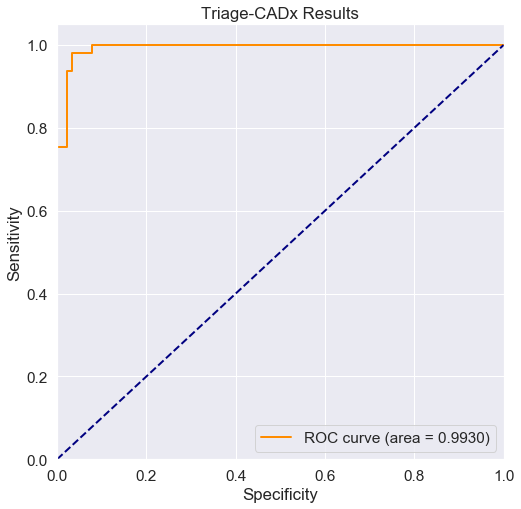

In [206]:
rocplot(Y_test,model.predict(X_test).reshape(-1))